Generate stl mesh from the binary masks

In [10]:
import meshlib.mrmeshpy as mr
import meshlib.mrmeshnumpy as mrn
import os
import SimpleITK as sitk

path = "/home/paulagmtz/TFM_PAULA_24/DATA_TFM/BINARY_MASKS/"
im_list = os.listdir(path)
for i in range(len(im_list)):
    inputData = path + im_list[i]
    name = os.path.splitext(im_list[i])[0]
    im = sitk.ReadImage(inputData, sitk.sitkFloat32)
    im_arr = sitk.GetArrayFromImage(im)
    #convert 3D array to SimpleVolume data
    simpleVolume = mrn.simpleVolumeFrom3Darray(im_arr)

    #convert SimpleVolume to FloatGrid data
    floatGrid = mr.simpleVolumeToDenseGrid(simpleVolume )

    #make mesh by iso-value = 0.5 and voxel size = (0.1, 0.1, 0.1)
    my_mesh = mr.gridToMesh(floatGrid , mr.Vector3f(0.1, 0.1, 0.1), 0.5)
    # print(f"/home/paulagmtz/TFM_PAULA_24/DATA_TFM/stl/{str(im_list[i])}_mesh.stl")

    #save mesh
    mr.saveMesh(my_mesh,f"/home/paulagmtz/TFM_PAULA_24/DATA_TFM/stl/{name}_mesh.stl")

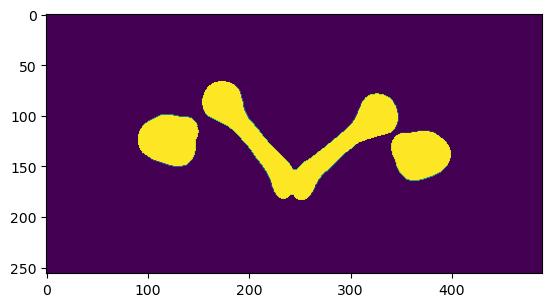

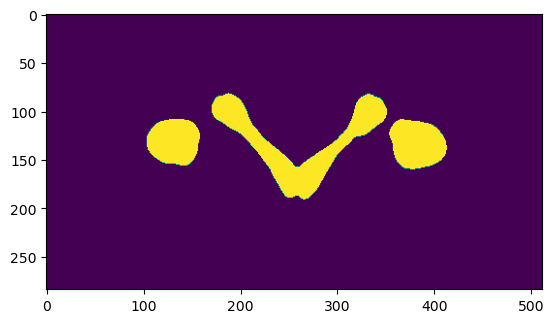

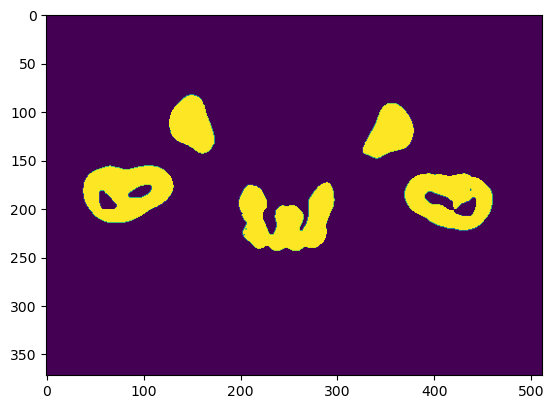

KeyboardInterrupt: 

In [2]:
# from scipy.ndimage import label
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import ndimage
# import skimage
# from skimage import morphology


# path = "/home/paulagmtz/TFM_PAULA_24/DATA_TFM/BINARY_MASKS/"

# im_list = os.listdir(path)
# for i in im_list:
#     inputData = path + i
#     im = sitk.ReadImage(inputData, sitk.sitkUInt8)
    
    
#     # # Apply Dilation
#     # kernel_radius = 5
#     # bmcif = sitk.BinaryDilateImageFilter() #  BinaryMorphologicalClosingImageFilter, BinaryDilateImageFilter
#     # bmcif.SetKernelType(sitk.sitkBall) # BinaryErodeImageFilter, BinaryMorphologicalOpeningImageFilter 
#     # bmcif.SetKernelRadius(kernel_radius)

#     # mask_dilation = bmcif.Execute(im)

#     # # Apply Erosion
#     # kernel_radius = 5
#     # bmcif = sitk.BinaryErodeImageFilter() # BinaryErodeImageFilter, BinaryMorphologicalClosingImageFilter, BinaryDilateImageFilter
#     # bmcif.SetKernelType(sitk.sitkBall)
#     # bmcif.SetKernelRadius(kernel_radius)

#     # mask_dil_open = bmcif.Execute(mask_dilation)
    
#     im_arr = sitk.GetArrayFromImage(im)
    
    
#     # threshold = np.array([0.2])

#     class_segmentation = im_arr.astype(np.uint8)

#     # Perform connected components labeling on the thresholded segmentation
#     labeled, num_features = label(class_segmentation)

#     # Filter out small components (adjust the minimum size as needed)

#     max_size = 0
#     for label_value in range(1, num_features + 1):
#         component_mask = (labeled == label_value).astype(np.float32)
#         component_size = component_mask.sum()
        
#         if component_size > max_size:
#             max_size = component_size 
#             max_component = component_mask

#     class_segmentation = max_component
    
#     clean_mask = sitk.GetImageFromArray(class_segmentation)
#     # Fill in the holes in the image
#     # Fill in the holes in the image
#     # for i in range(10):
        
#     #     filled_image = ndimage.binary_fill_holes(class_segmentation)
#     #     class_segmentation = filled_image
#     #     # sitk.WriteImage(clean_mask,path + i)
#     # filled_image = skimage.morphology.closing(class_segmentation)
#     # class_segmentation = filled_image
#     plt.imshow((class_segmentation)[22,:,:])
#     plt.show()



In [6]:
import stl
from stl import mesh

my_mesh = mesh.Mesh.from_file("/home/paulagmtz/TFM_PAULA_24/DATA_TFM/stl/mesh.stl")



In [15]:
print(dir(my_mesh))

['_Logged__get_name', '_LoggerBase__get_name', '__abstractmethods__', '__annotations__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_areas', '_ascii_reader', '_centroids', '_get_or_update', '_load_ascii', '_load_binary', '_set', '_write_ascii', '_write_binary', 'areas', 'attr', 'centroids', 'check', 'critical', 'data', 'debug', 'dtype', 'error', 'exception', 'from_3mf_file', 'from_file', 'from_files', 'from_multi_file', 'get', 'get_header', 'get_mass_properties', 'get_mass_properties_with_density', 'get_unit_normals', 'info', 'is_closed', 'item

Tengo stl y quiero pasarlo a OFF para que los archivos que generen sean como los del modelnet40. en estos archivos tengo descrito:

        OFF
        num_vertices num_faces num_edges
        vertices
        faces

Ejemplo:


        OFF
        8 6 12
        1.0 0.0 0.0
        0.0 1.0 0.0 
        ..
        4 0 1 5 4
        4 1 2 6 5
        ...

# Convert stl to off

In [13]:
from stl import mesh
import numpy as np

def convert_to_off(stl_filename, off_filename):
    stl_mesh = mesh.Mesh.from_file(stl_filename)

    # Obtener vértices y caras
    vertices = stl_mesh.vectors.reshape((-1, 3))
    faces = np.arange(len(vertices)).reshape((-1, 3))

    # Escribir en formato OFF
    with open(off_filename, 'w') as off_file:
        off_file.write('OFF\n')
        off_file.write(f'{len(vertices)} {len(faces)} 0\n')

        for vertex in vertices:
            off_file.write(f'{vertex[0]} {vertex[1]} {vertex[2]}\n')

        for face in faces:
            off_file.write(f'3 {face[0]} {face[1]} {face[2]}\n')


stl_folder = "/home/paulagmtz/TFM_PAULA_24/DATA_TFM/stl/"
off_folder = "/home/paulagmtz/TFM_PAULA_24/DATA_TFM/off/"
for i in os.listdir(stl_folder):
    
    stl_filename = stl_folder + i
    name = os.path.splitext(i)[0]
    
    off_filename = off_folder+name+".off"
    
    convert_to_off(stl_filename, off_filename)


In [12]:
from occmodelviewer import viewer
from occmodel import Face, Solid, OCCError
 
import os
import sys
 
# read_off definition
 
if __name__ == '__main__':
    if len(sys.argv) != 2:
        print('Usage: python view_off.py off_file')
        exit(1)
 
    off_file = '/home/paulagmtz/TFM_PAULA_24/DATA_TFM/stl/mesh.off'
    assert os.path.exists(off_file)
 
    vertices, faces = read_off(off_file)
 
    real_faces = []
    for face in faces:
 
        points = []
        for i in range(1, len(face), 1):
            points.append(vertices[face[i]])
 
        real_faces.append(points)
 
    occfaces = []
    for real_face in real_faces:
        if len(real_face) == 3:
            try:
                occfaces.append(Face().createPolygonal(real_face))
            except OCCError as e:
                print(e, real_face)
        else:
            assert(False)
 
    viewer(occfaces)

ModuleNotFoundError: No module named 'occmodelviewer'